In [1]:
import sys
sys.path.append('./../../')

import sim.propagate as prop
import torch
import matplotlib.pyplot as plt


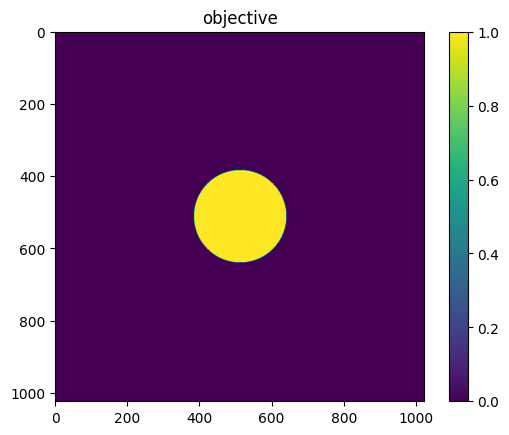

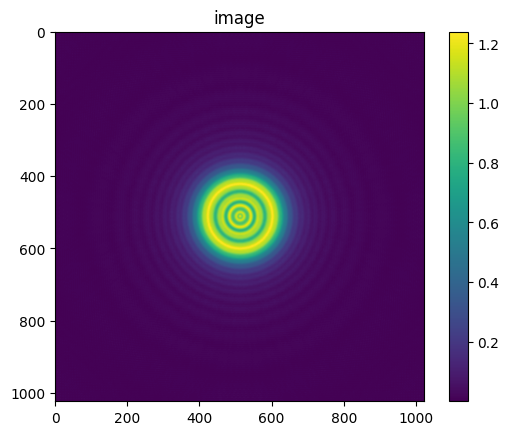

In [23]:
def get_obj():
    n = 9
    r = 7
    X = torch.arange(-(2 ** n), 2 ** n) ** 2 + torch.arange(-(2 ** n), 2 ** n).unsqueeze(-1) ** 2
    idx = X < (2 ** r) ** 2
    n_idx = X >= (2 ** r) ** 2
    X[n_idx] = 0
    X[idx] = 1
    
    X = X.cuda()
    X = X / X.max() # normalize
    X = X.to(torch.complex128) # NOTE: complex 64 induces accumulated error which is catastrophic
    return X

# preprocess
def get_show_mat(X):
    X = X.abs().cpu().numpy()
    return X



# plt.show(get_show_mat(X))

wl = 500
pixel = 2 ** 3
z = 500 * 20

X = prop.propagate(get_obj(), pixel, wl, z)
# (resolved) bug: X almost explodes, caused inadequate precision
# (resolved) bug: suspicious square shape, because of parameter setting (Fourier transform induces periodic boundary condition, which essentially superinposes the pattern from replicated same obejctive)

fig, ax = plt.subplots(1, 1)
s = ax.imshow(get_show_mat(get_obj()))
ax.set_title('objective')
fig.colorbar(s)

fig, ax = plt.subplots(1, 1)
s = ax.imshow(get_show_mat(X))
ax.set_title('image')
fig.colorbar(s)

- scale of objective
    - hole
        - user: input image
        - we fix the physical length of a pixel (1nm)
    - zero padding = n * hole
- wl
- z
